# **Final project - couses of death in the world**
## Group J
### Group members:
- <a href='#1'>Yuval Granot, 316222769</a> 
- <a href='#1'>Shira Weinberger</a>  
- <a href='#2'>Geula Melamed</a>
- <a href='#2'>Daniel Weil, 318410917</a>



# Table of Contents:
1. [introduction](#section1)
2. [Importing (Python packages and data)](#section2)
3. [The project content](#section3)
4. [Evaluation and Prediction](#section4)

# <a id='1'> 1. Introduction</a>

We chose to work on "causes of death" file.Perhaps dealing with a subject that is not so convenient - but if we become aware of the causes of death on Earth and, identify some processes we will be able to prevent some of them as well as prolong our life expectancy. 

[Train - 50 Ways to Say Goodbye (Official Music Video)](https://www.youtube.com/watch?v=GSBFehvLJDc)

<div>
<img src= https://github.com/WeilDaniel/DataScience2021B/blob/main/picture.jpg width="700"/>
</div>

# <a id='2'>2. Importing (Python packages and data)</a>

In [116]:
conda install -c plotly plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from scipy import misc
import plotly.graph_objs as gobj
from IPython.display import HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
init_notebook_mode(connected=True)
import os

The DadaFrame has taken from this [ourworldindata.org](https://ourworldindata.org/causes-of-death). We read the csv causes-of-death file and display the first head lines.

In [4]:
url='https://raw.githubusercontent.com/WeilDaniel/DataScience2021B/main/causes%20of%20death.csv'
doc= pd.read_csv(url)
doc.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Lower respiratory infections,Intestinal infectious diseases,Protein-energy malnutrition,Terrorism,Cardiovascular diseases,...,Neonatal disorders,Alcohol use disorders,Exposure to forces of nature,Diarrheal disease,Environmental heat and cold exposure,Nutritional deficiencies,Self-harm,Conflict and terrorism,Diabetes mellitus,Poisonings
0,Afghanistan,AFG,1990,NaN,6469.977091,22836.91235,295.382206,1607.703797,12.0,46498.08502,...,18075.80029,75.595221,0.000000,8817.260208,226.789403,1667.386134,740.448500,1489.999290,3361.736409,170.742286
1,Afghanistan,AFG,1991,NaN,6347.158764,22325.63393,303.866598,1558.132316,68.0,46967.36104,...,18349.12997,76.109641,1349.999434,8588.463794,164.830417,1616.756233,762.245179,3370.000153,3362.470217,172.032657
2,Afghanistan,AFG,1992,NaN,6659.741428,23205.28075,317.750121,1617.721576,49.0,48355.55851,...,19982.14956,81.138310,614.000083,8924.932420,92.522183,1678.557625,856.912927,4343.997795,3445.705567,190.404111
3,Afghanistan,AFG,1993,NaN,8068.386263,28229.71540,333.978331,1931.808553,NaN,50072.56390,...,27291.23529,87.514744,109.999998,11976.501320,104.167461,2001.122436,975.603772,4097.000207,3563.236367,217.622614
4,Afghanistan,AFG,1994,NaN,9432.845127,32652.29763,348.419085,2351.629206,22.0,51416.81544,...,29862.68087,90.464149,160.000003,13296.448480,112.072652,2434.014268,1028.742412,8959.000461,3639.707847,236.240573


# <a id='3'>3. The project content</a>

### Most common and least common causes of death:
We have created a table that summarizes the causes of death in the last 5 years (from 2013-2018) and then we present the most common and least common causes of death in the whole world.

In [5]:
from2013 = doc.loc[2013 <= doc['Year']]
sum_de = from2013.sum(axis = 0, skipna = True)
data_sum = pd.DataFrame(sum_de)
columns = data_sum.iloc[:,4:]
table = from2013.pivot_table(columns=columns,index='Year', aggfunc = 'sum')

table1 = table.sum(axis = 0, skipna = True)
max_de = table1.nlargest(5)
min_de = table1.nsmallest(5)
max_data = pd.DataFrame(max_de).style.set_caption("The top 5")
min_data = pd.DataFrame(min_de).style.set_caption("The lowest 5")
display(max_data, min_data)

,0
Cardiovascular diseases,405516959.104115
Neoplasms,221047106.198929
Chronic respiratory diseases,86114687.957875
Lower respiratory infections,60765986.190081
Alzheimer disease and other dementias,57377015.045552


,0
Exposure to forces of nature,258632.136665
Terrorism,500796.000000
Environmental heat and cold exposure,1293571.699013
Poisonings,1784770.671253
Intestinal infectious diseases,2658405.546222


### Amount of Cardiovascular diseases: 
We present the amount of Cardiovascular diseases, the first cause of death in the world.

In [6]:
year17 = doc.loc[2017 == doc['Year']]
data = dict(
    type = 'choropleth', 
    locations = year17['Entity'],
    locationmode = 'country names', 
    colorscale = [[0,"rgb(255, 60, 20)"],[0.25,"rgb(255, 100, 20)"],[0.5,"rgb(255, 140, 20)"]],
    text =  year17['Entity'], 
    z = year17['Cardiovascular diseases'], 
    zauto = False,
    zmin = 0,
    zmax = 400000,
    zmid = 70000,
    colorbar = {'title':'cardio in the world'}
)

layout = dict(geo = dict(scope ='world'))
choromap = gobj.Figure(data = [data],layout=layout)
plot(choromap)
HTML('<iframe src=temp-plot.html width=700 height=450></.iframe>')

### Plot bar on the top 3:
Here we can see a "plot bar", which reflects the three most common causes of death in the world - and a shows clearly the increase when it comes to cardio disease.

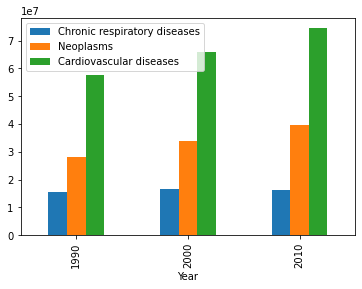

In [7]:
year = doc.loc[doc['Year'] % 10 == 0]
sum_big = year.sum(axis = 0, skipna = True)
big_de = pd.DataFrame(sum_big)
features = big_de.iloc[:,4:]
table = year.pivot_table(columns=features,index='Year', aggfunc = 'sum') 
df2 = pd.DataFrame(table, columns=['Chronic respiratory diseases','Neoplasms', 'Cardiovascular diseases'])
df2.plot.bar()

### Advanced countries in Europe:
After the diagnosis of an increase in cardio's death - it's amazing to see that in advanced countries in Europe there is a significant decrease in the number of deaths of this death's cause (from 1990-2015 at least).

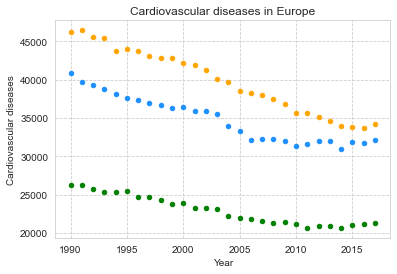

In [122]:
sweden = doc[doc['Entity'].str.contains('Sweden')]
sweden_car = sweden.loc[:,['Year','Cardiovascular diseases']]

switzerland = doc[doc['Entity'].str.contains('Switzerland')]
switzerland_car = switzerland.loc[:,['Year','Cardiovascular diseases']]

Belgium = doc[doc['Entity'].str.contains('Belgium')]
Belgium_car = Belgium.loc[:,['Year','Cardiovascular diseases']]

ax1 = sweden_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='orange', title = 'Cardiovascular diseases in Europe')    
ax2 = switzerland_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='g', ax=ax1)    
ax3 = Belgium_car.plot(kind='scatter', x='Year', y='Cardiovascular diseases', color='dodgerblue', ax=ax1)
plt.show()

### Countries from south of  Sahara Desert - Africa:
Contrary to what we saw, here it's instability in an area where malaria is still a significant disease - in contrast to the vast majority of the world.
The graph shows a spread from 2000-2010, or strange jumps in it.

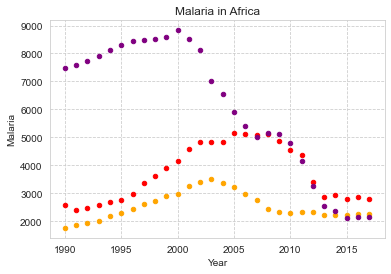

In [123]:
liberia = doc[doc['Entity'].str.contains('Liberia')]
liberia_mal = liberia.loc[:,['Year','Malaria']]

congo = doc[doc['Entity'].str.contains('Congo')]
congo_mal = congo.loc[:1446,['Year','Malaria']]

senegal = doc[doc['Entity'].str.contains('Senegal')]
senegal_mal = senegal.loc[:,['Year','Malaria']]

ax1 = liberia_mal.plot(kind='scatter', x='Year', y='Malaria', color='red', title ='Malaria in Africa' )    
ax2 = congo_mal.plot(kind='scatter', x='Year', y='Malaria', color='orange', ax=ax1)    
ax3 = senegal_mal.plot(kind='scatter', x='Year', y='Malaria', color='purple', ax=ax1)
plt.show()  

## Malaria in the world:


In [124]:
year17 = doc.loc[2017 == doc['Year']]

data = dict(
    type = 'choropleth', 
    locations = year17['Entity'],
    locationmode = 'country names', 
    colorscale = [[0,"rgb(255, 60, 20)"],[0.25,"rgb(255, 100, 20)"],[0.5,"rgb(255, 140, 20)"]],
    text =  year17['Entity'], 
    z = year17['Malaria'], 
    zauto = False,
    zmin = 0,
    zmax = 155000,
    zmid = 70000,
    colorbar = {'title':'malaria in the world'}
)

layout = dict(geo = dict(scope ='world'))
choromap = gobj.Figure(data = [data],layout=layout)
plot(choromap)

HTML('<iframe src=temp-plot.html width=700 height=450></.iframe>')

### Israel's graph:
Israel is a country that allocates a lot of resources to dealing with terrorism and security following an existential threat. 

Still, it is interesting to see the proportion between death from terrorism to death from road accidents or suicides - which requires the authorities to rethink their investment of budgets, and reduce all graphs.

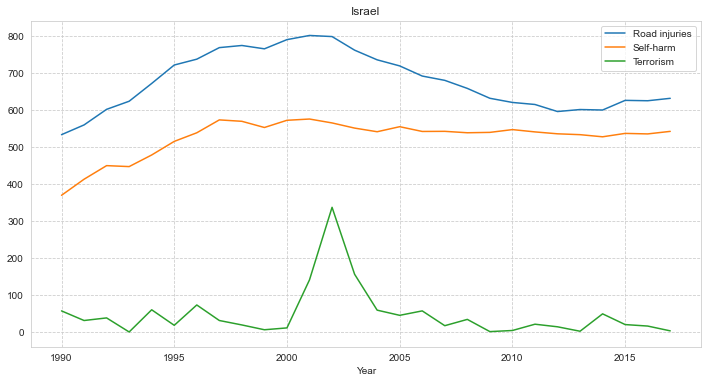

In [126]:
israel = doc[doc['Entity'].str.contains('Israel')]
israel_ter = israel.loc[:,['Year','Terrorism','Road injuries', 'Self-harm']]
table2 = israel_ter.pivot_table(index='Year', aggfunc = 'sum') 
table2.plot.line(figsize=(12,6), title = 'Israel')

# Isreal vs world:
Here we see a display of a correlation between preventable deaths, a table of Israel and a table of the whole world.

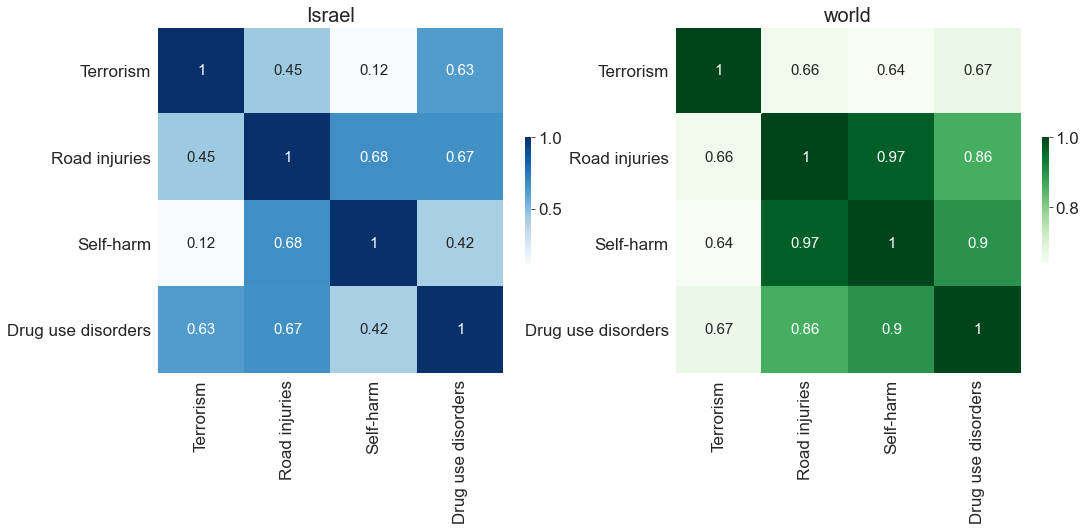

In [205]:
features = ['Terrorism','Road injuries', 'Self-harm','Drug use disorders']
correlation_matrix = israel[features].corr().round(2)
correlation_matrix1 = doc[features].corr().round(2)

fig = plt.figure(figsize = (17, 17))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax1.set_title('Israel', fontsize = 20)
ax2.set_title('world', fontsize = 20)

sns.heatmap(data=correlation_matrix, ax=ax1, cmap = 'Blues', square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 15})
sns.heatmap(data=correlation_matrix1, ax=ax2, cmap = 'Greens', square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 15})

plt.show()

## Insights:
- <a>Despite ongoing terrorism, terrorism has low affect suicides.</a> 
- <a>In the world the correlation between road accidents and suicides is very high.</a>  
- <a>Compared to the world, in Israel there is less noticeable connection between drug use and road accidents</a>

### Internal diseases correlation
Here are four internal diseases. Let's look at a possible connection between them:  

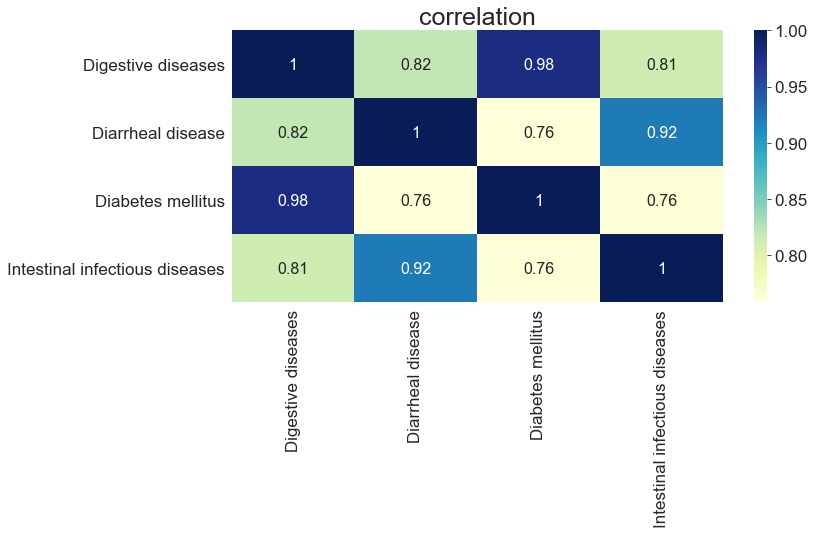

In [211]:
features2 = ['Digestive diseases', 'Diarrheal disease',  'Diabetes mellitus', 'Intestinal infectious diseases']
correlation_matrix = doc[features2].corr()
fig = plt.figure(figsize = (11,5))
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.title('correlation', fontsize = 25)
sns.heatmap(data=correlation_matrix, cmap ='YlGnBu', annot=True, annot_kws={"size": 16},)

## Insights:
- <a>Digestive disease and Diabetes disease has a very strong link.</a> 
- <a>There is a clear link between infectious diseases and intestinal diseases.</a>  

# <a id='4'>4. Evaluation and Prediction</a>

### Prediction - Conflict and terrorism - syria
We create a model that will make a prediction for conflict and terrorism in syria from the following features: 'Interpersonal violence', 'Nutritional deficiencies', 'Maternal disorders'. We divide the model into 70% training and 30% test (as is customary). 

In [148]:
Syria = doc[doc['Entity'].str.contains('Syria')].loc[1996 <= doc['Year']]
Syria_pred = Syria[['Interpersonal violence', 'Nutritional deficiencies', 'Maternal disorders', 'Conflict and terrorism']]

In [207]:
# Aquire data from multiple collumns.
features = ['Interpersonal violence', 'Nutritional deficiencies', 'Maternal disorders']
X = Syria_pred[features]
y = Syria_pred['Conflict and terrorism']

# Spliting the data to train and test set.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

# Define model.
model = sk.tree.DecisionTreeRegressor(random_state=1)

# Fit model.
model.fit(X_train,y_train)

print("Making predictions for Conflict and terrorism:")
prediction= pd.DataFrame(y_test)

prediction['prediction'] = model.predict(X_test)
prediction.head()

Making predictions for Conflict and terrorism:


,Conflict and terrorism,prediction
5809,55169.912920,55472.169640
5806,60958.683030,50783.348700
5793,6.726683,6.805193
5803,44.207789,137.090877
5808,73538.919020,55472.169640


### Evaluation- MSE

In [150]:
# MSE is the mean square error, a measure for data validation.

def eval(x,y,model):                  
    pred = model.predict(x)
    y_alt=y.values
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))

eval(X_test,y_test,model)

MSE: 8935.278
